In [16]:
from decode_fish.imports import *
from decode_fish.funcs.file_io import *
from decode_fish.funcs.emitter_io import *
from decode_fish.funcs.utils import *
from decode_fish.funcs.evaluation import *
from decode_fish.funcs.plotting import *
from torch.utils.data import DataLoader
from decode_fish.funcs.routines import *
import seaborn as sns

import h5py

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/'
data_dirs = ['sim_density_fac05_1','sim_density_fac1_1','sim_density_fac2_1']

axis_names = {'jaccard':'detection accuracy (JI) %', 'rmse_vol':'localization error (nm)', 'rmse_lat':'lateral localization error (nm)', 'rmse_ax':'axial localization error (nm)', 'group_p':'N groups / N localizations','eff_3d':'3D efficiency','recall':'recall %', 'precision':'precision %'}

In [19]:
filename = 'fig7_file'
with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:
    print(f['eval_densities']['500'].keys())
    runs = list(f['eval_densities']['500'].keys())
    del(runs[0])
    del(runs[0])
colors = sns.color_palette(n_colors=len(runs)+1)

<KeysViewHDF5 ['FQ', 'GT', 'enabled:Falsexenabled:False', 'enabled:Falsexenabled:True', 'enabled:Truexenabled:False', 'enabled:Truexenabled:True']>


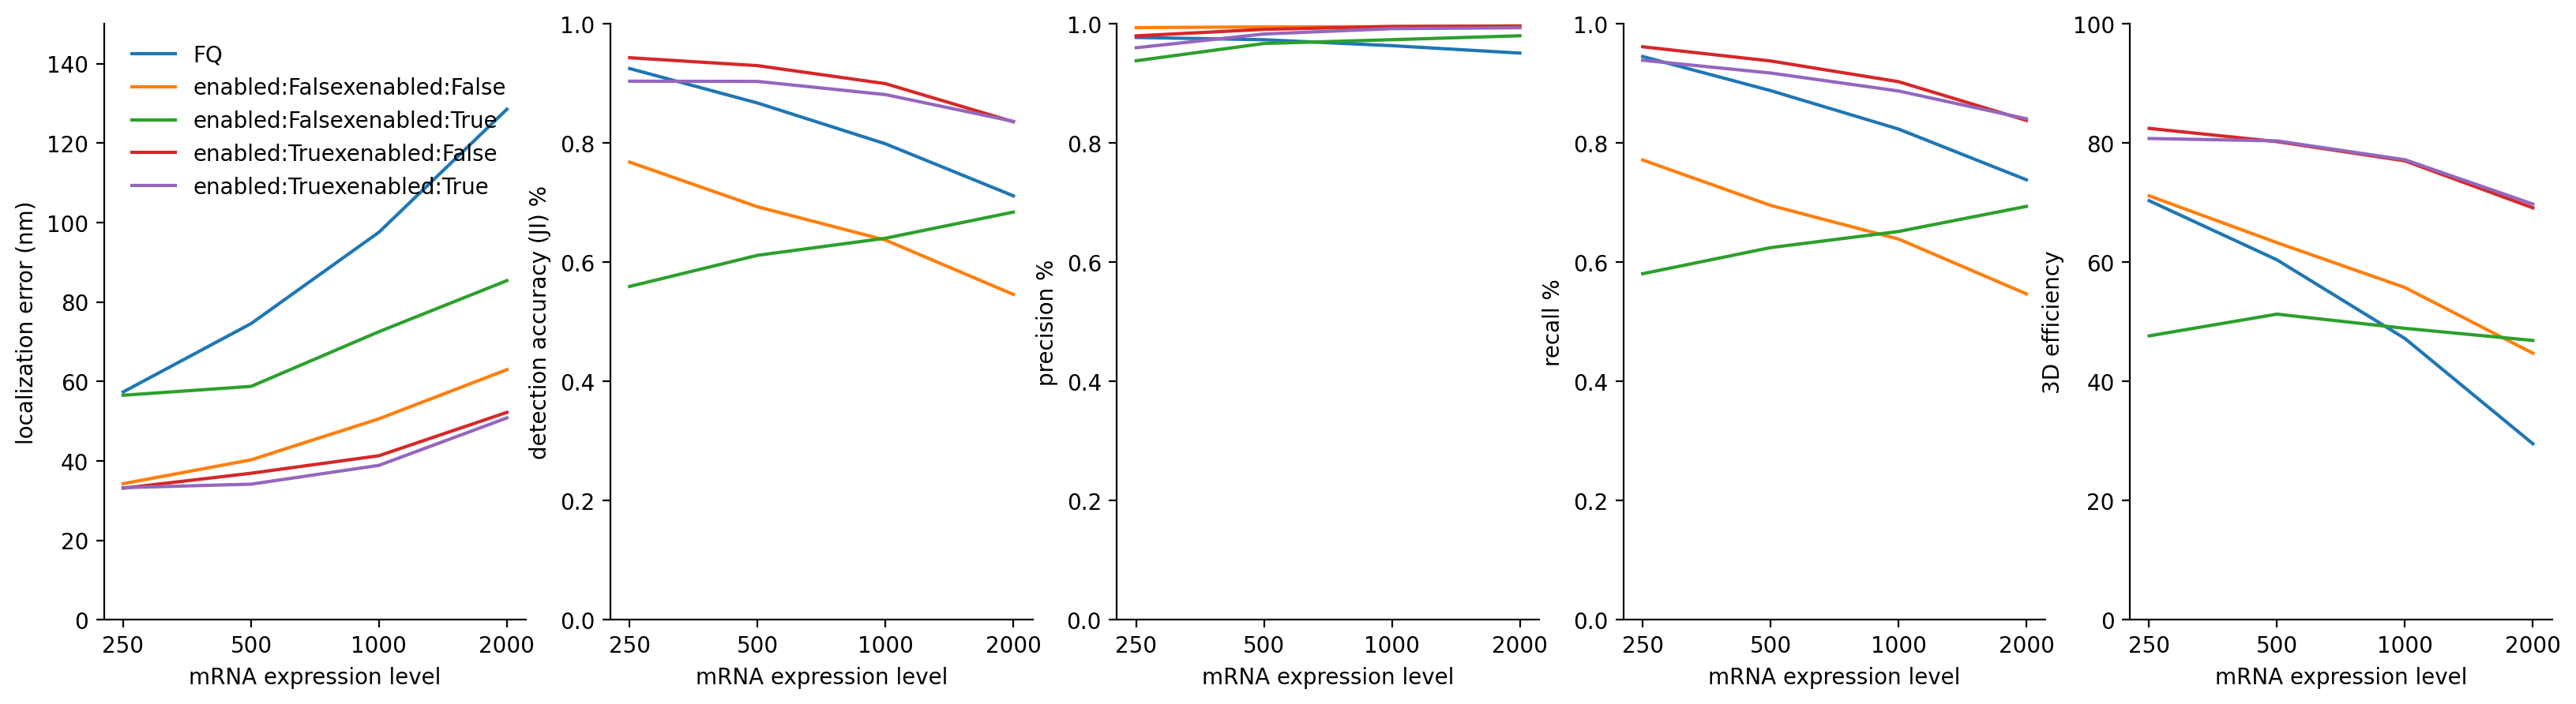

In [20]:
metrics = ['rmse_vol','jaccard','precision','recall','eff_3d']
alg_names = {'FISH-quant':'FQ'}
alg_cols = {'FISH-quant':colors[0]}
for i,r in enumerate(runs):
    alg_names[f'DECODE{i}'] = r
    alg_cols[f'DECODE{i}'] = colors[i+1]

metric_lims = {'rmse_vol':[0,150],'jaccard':[0,1],'recall':[0,1],'precision':[0,1],'eff_3d':[0,100]}
densities = [250,500,1000,2000]

plt.figure(figsize=(20,5))

with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:

    for i,m in enumerate(metrics):
        plt.subplot(1,len(metrics),i+1)
        
        for n,k in alg_names.items():
            plt.plot(np.arange(len(densities)), [f['eval_densities'][str(d)][k]['performance'][m][()][0] for d in densities], label=alg_names[n], color=alg_cols[n], linestyle='-')

        if i == 0:
            plt.legend(frameon=False)
        plt.ylabel(axis_names[m])
        plt.xlabel('mRNA expression level')
        plt.xticks(ticks=np.arange(len(densities)),labels=densities)
        plt.ylim(metric_lims[m])

        sns.despine()

(0.0, 40.0)

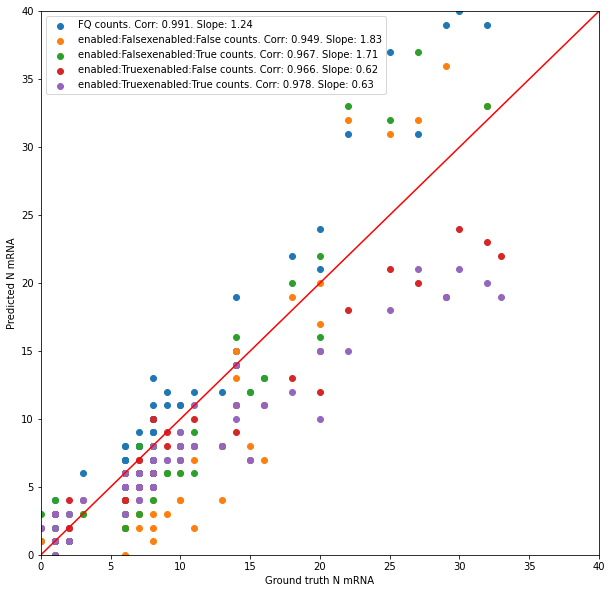

In [13]:
plt.figure(figsize=(10,10))

with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:
    
    GT = f['eval_foci']['GT']['foci_counts'][()]
    
    for i,a in enumerate(f['eval_foci'].keys()):
        if a != 'GT':
            pred_count = f['eval_foci'][a]['foci_counts'][()]
            corr = np.round(np.corrcoef([GT, pred_count])[0,1],3)
            slope = np.round(np.linalg.lstsq(GT.reshape(-1,1), pred_count,rcond=None)[0][0],2)
            plt.scatter(GT, pred_count, label=f'{a} counts. Corr: {corr}. Slope: {slope}', alpha=1.0)
            
plt.legend()
    
plt.plot([0,100],[0,100], 'red')
plt.xlabel('Ground truth N mRNA')
plt.ylabel('Predicted N mRNA')
plt.xlim(0,40)
plt.ylim(0,40)


KeyError: "Unable to open object (object 'conc_pre' doesn't exist)"

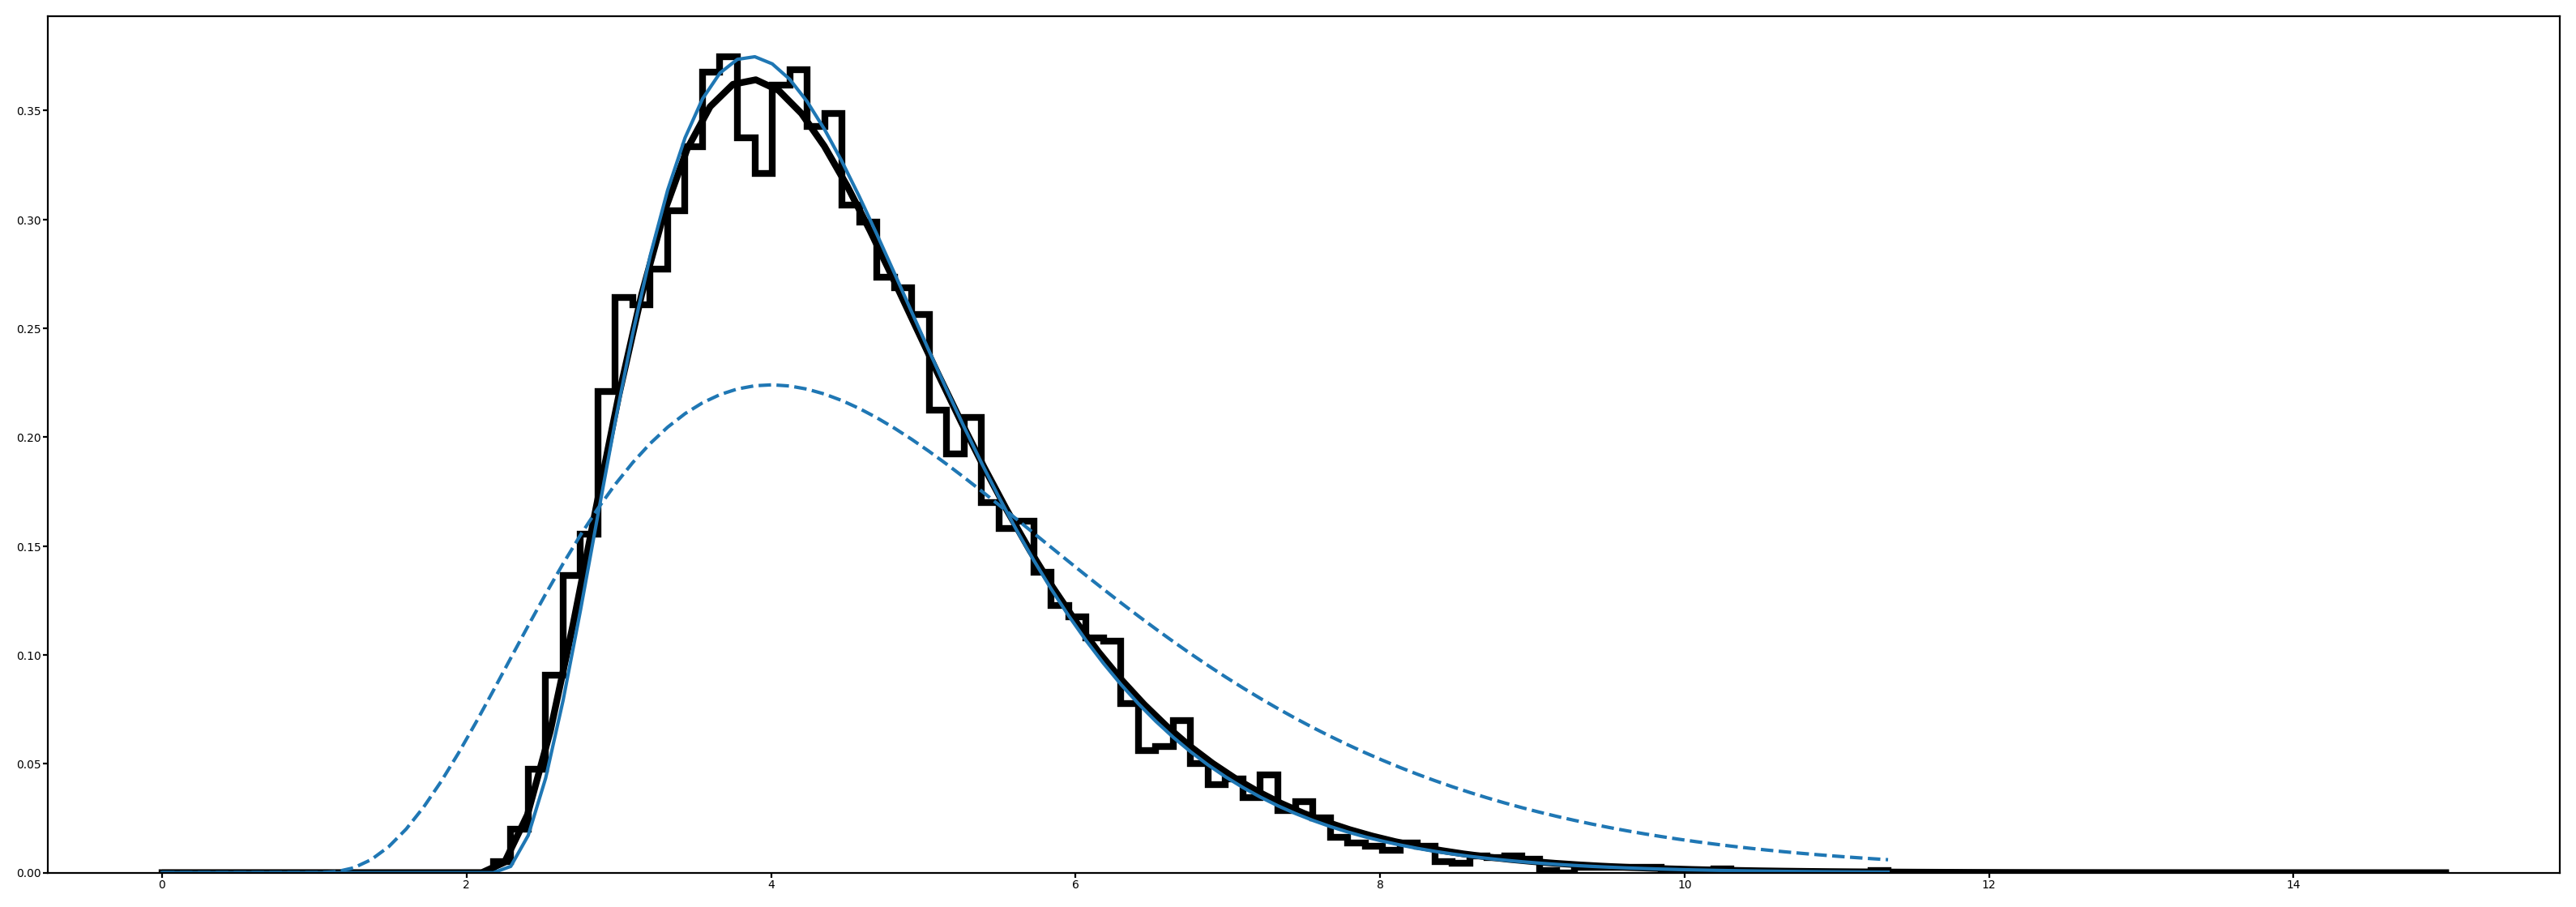

In [363]:
import scipy.stats as stats  

plt.figure(figsize=(20,7))

basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_density_fac1_2/'
full_gt_df = DF()
for i in range(5):
    img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, 2000, 'random', 'NR', i)
    full_gt_df = cat_emitter_dfs([full_gt_df, gt_df])

gt_ints = full_gt_df['int']
int_max = gt_ints.max()
bins = np.linspace(0, int_max, 100)

shape = 3.7504156297802815, 
scale = 0.6406917808418713, 
locaction = 2.104038290757017


x = np.linspace(0,15,101)
y = stats.gamma.pdf(x, shape, locaction, scale)
plt.plot(x, y, label='Fit', linewidth=3, color='black')

_ = plt.hist(gt_ints, bins=bins, label='GT', color='black', linewidth=3, histtype='step', density=True)

with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:
    
    colors = sns.color_palette(n_colors=len(f['microscope_state'].keys()))
    
    for i,m in enumerate(f['microscope_state'].keys()):
        
        g = f['microscope_state'][m]
        y_pre = stats.gamma.pdf(bins, g['conc_pre'][()], g['loc_pre'][()], 1/g['rate_pre'][()])
        plt.plot(bins, y_pre, linestyle='--', c=colors[i])
        
        y_post = stats.gamma.pdf(bins, g['conc_post'][()], g['loc_post'][()], 1/g['rate_post'][()])
        plt.plot(bins, y_post, label=m, c=colors[i])
        
#         plt.hist(f['eval_densities']['2000'][m]['locations']['int']+g['loc_post'][()], density=True, bins=bins, color=colors[i], alpha=0.2)
        
plt.legend()

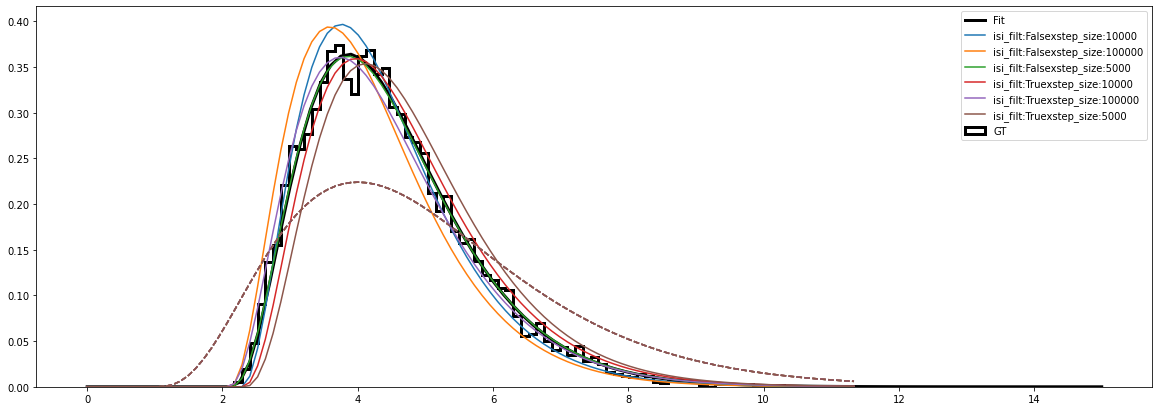

In [80]:
import scipy.stats as stats  

plt.figure(figsize=(20,7))

basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_density_fac1_2/'
full_gt_df = DF()
for i in range(5):
    img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, 2000, 'random', 'NR', i)
    full_gt_df = cat_emitter_dfs([full_gt_df, gt_df])

gt_ints = full_gt_df['int']
int_max = gt_ints.max()
bins = np.linspace(0, int_max, 100)

shape = 3.7504156297802815, 
scale = 0.6406917808418713, 
locaction = 2.104038290757017


x = np.linspace(0,15,101)
y = stats.gamma.pdf(x, shape, locaction, scale)
plt.plot(x, y, label='Fit', linewidth=3, color='black')

_ = plt.hist(gt_ints, bins=bins, label='GT', color='black', linewidth=3, histtype='step', density=True)

with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:
    
    colors = sns.color_palette(n_colors=len(f['microscope_state'].keys()))
    
    for i,m in enumerate(f['microscope_state'].keys()):
        
        g = f['microscope_state'][m]
        y_pre = stats.gamma.pdf(bins, g['conc_pre'][()], g['loc_pre'][()], 1/g['rate_pre'][()])
        plt.plot(bins, y_pre, linestyle='--', c=colors[i])
        
        y_post = stats.gamma.pdf(bins, g['conc_post'][()], g['loc_post'][()], 1/g['rate_post'][()])
        plt.plot(bins, y_post, label=m, c=colors[i])
        
#         plt.hist(f['eval_densities']['2000'][m]['locations']['int']+g['loc_post'][()], density=True, bins=bins, color=colors[i], alpha=0.2)
        
plt.legend()

In [21]:
filename = 'g1_file'
with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:
    
    GT = f['psf_state']['gt_psf'][()]
    GT /= GT.max()
    plot_3d_projections(GT)
    for m in f['psf_state'].keys():
        if 'gt' not in m:
            fit = f['psf_state'][m]['fit_psf'][()]
            fit /= fit.max()
            plot_3d_projections(fit)
        
        

KeyError: "Unable to open object (object 'psf_state' doesn't exist)"

In [22]:
import matplotlib
import matplotlib.gridspec as gridspec
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "arial"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.size'] = '5'
matplotlib.rcParams['axes.labelpad'] = 1
matplotlib.rcParams['xtick.major.pad'] = 1
matplotlib.rcParams['xtick.minor.pad'] = 1
matplotlib.rcParams['ytick.major.pad'] = 1
matplotlib.rcParams['ytick.minor.pad'] = 1

matplotlib.rcParams['xtick.major.size'] = 2
matplotlib.rcParams['xtick.minor.size'] = 1.5
matplotlib.rcParams['ytick.major.size'] = 2
matplotlib.rcParams['ytick.minor.size'] = 1.5

In [23]:
runs

['enabled:Falsexenabled:False',
 'enabled:Falsexenabled:True',
 'enabled:Truexenabled:False',
 'enabled:Truexenabled:True']

In [24]:
import scipy.stats as stats  
filename = 'fig6_file'
with h5py.File(f'../data/results/{filename}.hdf5', 'r') as f:
    print(f['eval_densities']['500'].keys())
    runs = list(f['eval_densities']['500'].keys())#[:4]
#     del(runs[0])
#     del(runs[0])
colors = sns.color_palette('colorblind',n_colors=len(runs)+1)

alg_names = {'FQ':'FISH-quant', 
             'enabled:Truexenabled:True':'DECODE', 
             'enabled:Falsexenabled:True':'DECODE fixed PSF',
             'enabled:Truexenabled:False':'DECODE fixed Intensity',
             'enabled:Falsexenabled:False':'DECODE fixed'}
alg_cols = {'FQ':colors[0]}

for i,r in enumerate(runs):
#     alg_names[f'DECODE{i}'] = r
    if 'FQ' not in r:
        print(i,r)
        alg_cols[r] = colors[i]

metric_lims = {'rmse_vol':[0,150],'jaccard':[0,1],'recall':[0,1],'precision':[0,1],'eff_3d':[0,100]}
densities = [250,500,1000,2000]


basedir = '/groups/turaga/home/speisera/share_TUM/FishSIM/sim_density_fac1_2/'
full_gt_df = DF()

for i in range(5):
    img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, 2000, 'random', 'NR', i)
    full_gt_df = cat_emitter_dfs([full_gt_df, gt_df])
    
gt_imgs = []
sl = np.s_[:1,:,50:150,50:150]
for d in densities:
    img, gt_df, fq_nog_df, fq_gmm_df = load_sim_fish(basedir, d, 'random', 'NR', 0)
    gt_imgs.append(cpu(img)[0][sl[1:]])

gt_ints = full_gt_df['int']
int_max = gt_ints.max()
bins = np.linspace(0, int_max, 50)

full_key = 'enabled:Truexenabled:True'

<KeysViewHDF5 ['FQ', 'GT', 'enabled:Falsexenabled:False', 'enabled:Falsexenabled:True', 'enabled:Truexenabled:False', 'enabled:Truexenabled:True']>
1 GT
2 enabled:Falsexenabled:False
3 enabled:Falsexenabled:True
4 enabled:Truexenabled:False
5 enabled:Truexenabled:True


<KeysViewHDF5 ['enabled:Falsexenabled:False', 'enabled:Falsexenabled:True', 'enabled:Truexenabled:False', 'enabled:Truexenabled:True']>


/groups/turaga/home/speisera/anaconda3/envs/decode2_dev/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


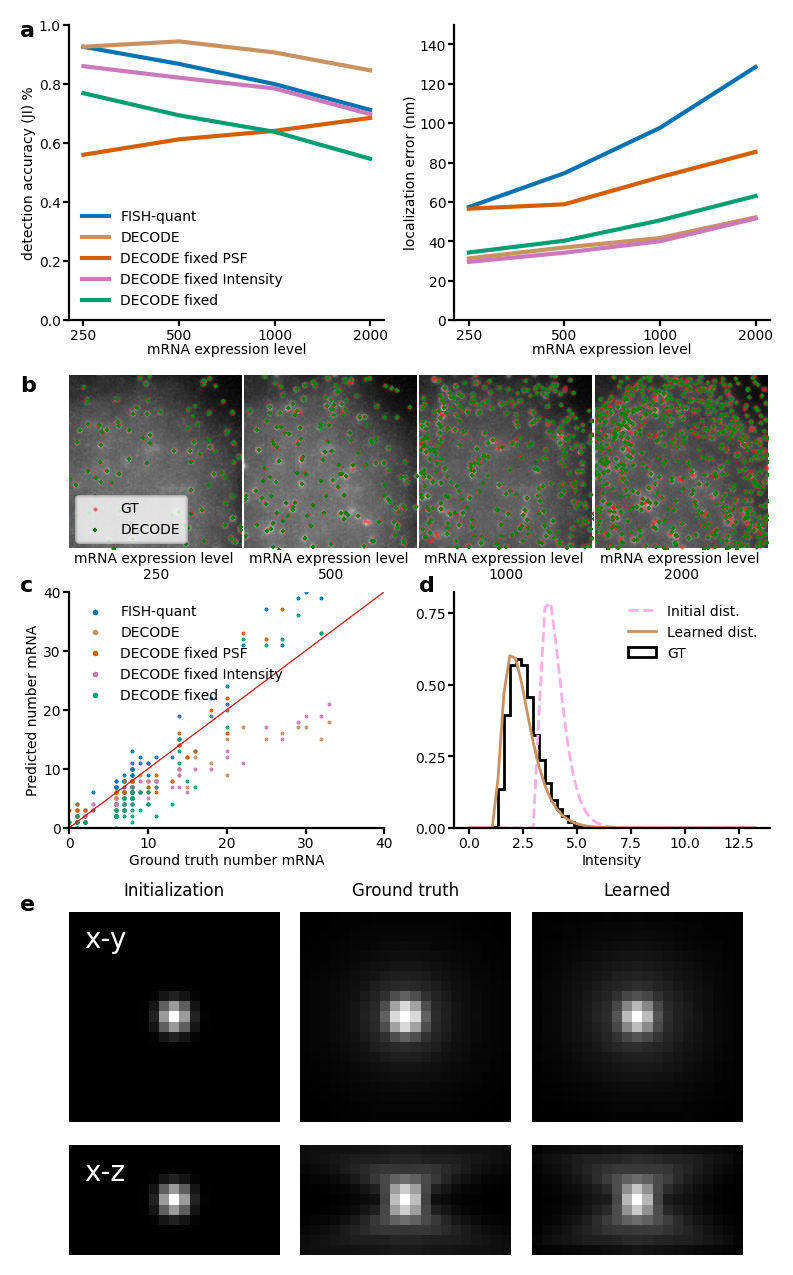

In [28]:
plt.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=cm2inch(8.9,15), constrained_layout=True)
tot_figure = fig.add_axes([0.0, 0.0, 1.0, 1.0])
tot_figure.axis('off')

x1 = 0.
x2 = 0.55


y1 = 0.75
y2 = 0.53
y3 = 0.32

h1 = 0.25
h2 = 0.2
h3 = 0.248

w1 = 0.45
w2 = 0.248

y4 = 0.07
y5 = 0.0
x31=0.3
x32=0.65
w3 = 0.3

ax_a = [fig.add_axes([x1,y1,w1,h1]), fig.add_axes([x2,y1,w1,h1])]  

with h5py.File(f'../data/results/{filename}.hdf5', 'a') as f:
    
    metrics = ['jaccard', 'rmse_vol']

    density_label = 'mRNA expression level'
    
    for i,m in enumerate(metrics):     
        for k,n in alg_names.items():
            ax_a[i].plot(np.arange(len(densities)), [f['eval_densities'][str(d)][k]['performance'][m][()][0] for d in densities], label=n, color=alg_cols[k], linestyle='-')

        ax_a[i].set_ylabel(axis_names[m])
        ax_a[i].set_xlabel(density_label,labelpad=0)
        ax_a[i].set_xticks(np.arange(len(densities)))
        ax_a[i].set_xticklabels(labels=densities)
        ax_a[i].set_ylim(metric_lims[m])

        if not i:
            ax_a[i].legend(frameon=False)
            
ax_b = [fig.add_axes([0.0,y2,w2,h2]), fig.add_axes([0.25,y2,w2,h2]), fig.add_axes([0.5,y2,w2,h2]), fig.add_axes([0.75,y2,w2,h2])]
    
with h5py.File(f'../data/results/{filename}.hdf5', 'a') as f:
    for i,d in enumerate(densities):

        gt_f = crop_df(get_df_from_hdf5(f['eval_densities'][str(d)]['GT']['locations']), sl, px_size_zyx=[100., 100., 100.])
        pred = crop_df(get_df_from_hdf5(f['eval_densities'][str(d)][full_key]['locations']), sl, px_size_zyx=[100., 100., 100.])

        ax_b[i].imshow(gt_imgs[i].max(0), cmap='gray')
        ax_b[i].scatter(gt_f['x']/100,gt_f['y']/100, s=0.3, color='red', alpha=0.5, marker='*', label='GT')
        ax_b[i].scatter(pred['x']/100+0.5,pred['y']/100+0.5, s=0.5, color='green', alpha=1., marker='+', label='DECODE')
        ax_b[i].text(50,117,f'mRNA expression level \n{d}',ha='center')
        ax_b[i].axis('off')    
        
        ax_b[i].set_xlim(0,100)
        ax_b[i].set_ylim(100,0)
    ax_b[0].legend(frameon=True)
            
ax_c = fig.add_axes([x1,y3,w1,h2])

with h5py.File(f'../data/results/{filename}.hdf5', 'a') as f:
    
    GT = f['eval_foci']['GT']['foci_counts'][()]
    
    for k,n in alg_names.items():
        if a != 'GT':
            pred_count = f['eval_foci'][k]['foci_counts'][()]
            corr = np.round(np.corrcoef([GT, pred_count])[0,1],3)
            slope = np.round(np.linalg.lstsq(GT.reshape(-1,1), pred_count,rcond=None)[0][0],2)
            ax_c.scatter(GT, pred_count, alpha=1., s=0.2, color=alg_cols[k]) # \n Corr: {corr}. Slope: {slope}
            ax_c.scatter([-5,-5],[-5,-5],color=alg_cols[k], label=f'{n}', alpha=1.0, s=1.) # \n Corr: {corr}. Slope: {slope}
            ax_c.plot([0,40],[0,40],color='red', linewidth=0.3, alpha=0.5)
    
    plt.locator_params(axis = 'x', nbins = 4)
    plt.locator_params(axis = 'y', nbins = 4)
    
    ax_c.legend(frameon=False)
    
    ax_c.set_xlim(0,40)
    ax_c.set_ylim(0,40)
    
    ax_c.set_xlabel('Ground truth number mRNA')
    ax_c.set_ylabel('Predicted number mRNA')

ax_d = fig.add_axes([x2,y3,w1,h2])

with h5py.File(f'../data/results/{filename}.hdf5', 'a') as f:
    
    _ = ax_d.hist(gt_ints/2, bins=bins, label='GT', color='black', linewidth=1, histtype='step', density=True)
    
    for k,n in alg_names.items():
        if 'DECODE' in n and 'fixed' not in n:
            print(f['microscope_state'].keys())
            g = f['microscope_state'][k]
            y_pre = stats.gamma.pdf(bins, g['conc_pre'][()], g['loc_pre'][()], 1/g['rate_pre'][()])
            plt.plot(bins, y_pre, linestyle='--', c=colors[-1], linewidth=1, label='Initial dist.')
        
            y_post = stats.gamma.pdf(bins, g['conc_post'][()], g['loc_post'][()], 1/g['rate_post'][()])
            plt.plot(bins, y_post, c=alg_cols[k], linewidth=1, label='Learned dist.')    
    
    plt.locator_params(axis = 'y', nbins = 4)
    ax_d.legend(frameon=False)
    ax_d.set_xlabel('Intensity')
    
y4 = 0.05
y5 = -0.05
x31=0.33
x32=0.66
w3 = 0.3
h4=0.22
h5=0.22/2

ax_e = [fig.add_axes([x1,y4,w3,h4]), fig.add_axes([x1,y5,w3,h5]),
        fig.add_axes([x31,y4,w3,h4]), fig.add_axes([x31,y5,w3,h5]),
        fig.add_axes([x32,y4,w3,h4]), fig.add_axes([x32,y5,w3,h5])]  

with h5py.File(f'../data/results/{filename}.hdf5', 'a') as f:
    
#     psf_gt = f['psf_state']['gt_psf'][()]
#     psf_fit = f['psf_state'][list(alg_names.keys())[1]]['fit_psf'][()]
#     psf_init = f['psf_state'][list(alg_names.keys())[1]]['init_psf'][()]
    
    psf_gt /= psf_gt.max()
    psf_fit /= psf_fit.max()
    psf_init /= psf_init.max()

    ax_e[0].imshow(psf_init.mean(0), cmap='gray')
    ax_e[0].text(1,3,'x-y', color='white', fontsize=10)
    ax_e[0].set_title('Initialization')
    
    ax_e[1].imshow(psf_init.mean(1), cmap='gray')
    ax_e[1].text(1,3,'x-z', color='white', fontsize=10)
    
    ax_e[2].imshow(psf_gt.mean(0), cmap='gray')
    ax_e[2].set_title('Ground truth')
    ax_e[3].imshow(psf_gt.mean(1), cmap='gray')
    
    ax_e[4].imshow(psf_fit.mean(0), cmap='gray')
    ax_e[4].set_title('Learned')
    ax_e[5].imshow(psf_fit.mean(1), cmap='gray')
    
    for a in ax_e:
        a.axis('off')
        
tot_figure.text(-0.07, 0.99, 'a', fontsize=8, ha='left', fontweight='bold')
tot_figure.text(-0.07, 0.69, 'b', fontsize=8, ha='left', fontweight='bold')
tot_figure.text(-0.07, 0.52, 'c', fontsize=8, ha='left', fontweight='bold')
tot_figure.text(0.5, 0.52, 'd', fontsize=8, ha='left', fontweight='bold')
tot_figure.text(-0.07, 0.25, 'e', fontsize=8, ha='left', fontweight='bold')
    
sns.despine()

In [26]:
cfg = OmegaConf.load(f'/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/models/fishcod/Fig_sim_density/sweep_fig3/{full_key}/train.yaml')

cfg.foci.n_foci_avg = 0.0
model, post_proc, micro, img_3d, decode_dl = load_all(cfg)

psf_init = get_gaussian_psf(cfg.PSF.psf_extent_zyx,cfg.PSF.gauss_radii)
psf_init = cpu(psf_init.psf_volume[0])
psf_vol = cpu(micro.psf.psf_volume[0])
# psf_init /= psf_init.max()
# psf_vol /= psf_vol.max()
psf_fit = psf_vol

/groups/turaga/home/speisera/anaconda3/envs/decode2_dev/lib/python3.7/site-packages/torch/cuda/__init__.py:81: UserWarning: 
    Found GPU2 NVS 510 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


20 volumes


In [27]:
psf_gt = cpu(load_tiff_image(cfg.evaluation.psf_path)[0])
psf_gt /= psf_gt.max()

In [55]:
!ls /groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/models/fishcod/Fig_sim_density/fig3_file

ls: cannot access '/groups/turaga/home/speisera/Mackebox/Artur/WorkDB/deepstorm/models/fishcod/Fig_sim_density/fig3_file': No such file or directory
